## 01

Net_dropout(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=300, bias=True)
  (fc4): Linear(in_features=300, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
Epoch 1, Training loss: 2.055663070480029, Validation loss: 1.2375012958049774, accuracy: 53.70%
Epoch 2, Training loss: 0.8271718637645245, Validation loss: 0.5674089422821998, accuracy: 82.89%
Epoch 3, Training loss: 0.47817958794534204, Validation loss: 0.3982996094971895, accuracy: 89.26%
Epoch 4, Training loss: 0.3885335473219554, Validation loss: 0.34427203588187694, accuracy: 90.78%
Epoch 5, Training loss: 0.34273793049156664, Validation loss: 0.32229476045817135, accuracy: 91.48%
Epoch 6, Training loss: 0.3221699864168962, Validation loss: 0.310721049644053, accuracy: 91.87%
Epoch 7, Training loss: 0.3063480562965075,

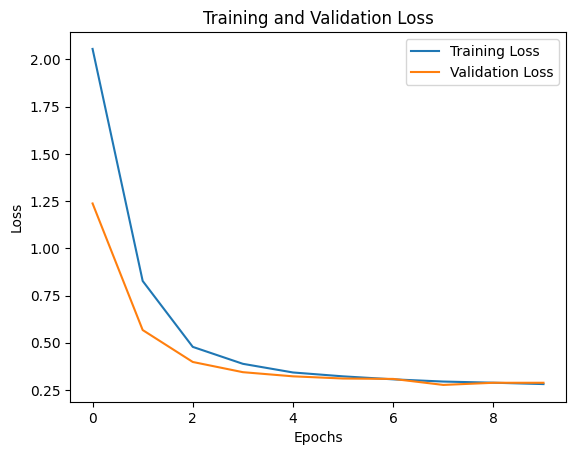

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 400)
        self.fc3 = nn.Linear(400, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

class Net_dropout(nn.Module):
    def __init__(self):
        super(Net_dropout, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 400)
        self.fc3 = nn.Linear(400, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 10)
        self.dropout = nn.Dropout(0.5) # 50% dropout

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.dropout(torch.relu(self.fc4(x)))
        x = self.fc5(x)
        return x


# Define Hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_type = "Net_dropout" # Net or Net_dropout
BATCH_SIZE = 100
LR = 0.01
EPOCH = 10
WD = 0.01

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)


exec(f"model = {model_type}().to(device)")
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=WD)

# Train the model
train_loss_list = []
val_loss_list = []

for epoch in range(EPOCH):
    train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Calculate validation loss
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(test_loader))
    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}, Training loss: {train_loss_list[-1]}, Validation loss: {val_loss_list[-1]}, accuracy: {accuracy:.2f}%")

# Plot the training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## 02

Random Normal
Epoch 1, Training loss: 6946.857758561198, Accuracy: 63.66%
Epoch 2, Training loss: 1047.8455708007812, Accuracy: 79.00%
Epoch 3, Training loss: 589.8534116699219, Accuracy: 82.95%
Epoch 4, Training loss: 398.2370047566732, Accuracy: 85.19%
Epoch 5, Training loss: 288.8685953328451, Accuracy: 86.73%
Epoch 6, Training loss: 223.92520488688152, Accuracy: 87.92%
Epoch 7, Training loss: 175.60352443440755, Accuracy: 88.95%
Epoch 8, Training loss: 141.64729008382162, Accuracy: 89.70%
Epoch 9, Training loss: 117.43682438354492, Accuracy: 90.55%
Epoch 10, Training loss: 94.32807568359375, Accuracy: 91.15%
He
Epoch 1, Training loss: 0.005197410242445767, Accuracy: 89.60%
Epoch 2, Training loss: 0.002681199097291877, Accuracy: 94.68%
Epoch 3, Training loss: 0.0020954033503658136, Accuracy: 95.85%
Epoch 4, Training loss: 0.001783049438575593, Accuracy: 96.45%
Epoch 5, Training loss: 0.0015700201970835527, Accuracy: 96.86%
Epoch 6, Training loss: 0.0015161304803487535, Accuracy: 97.

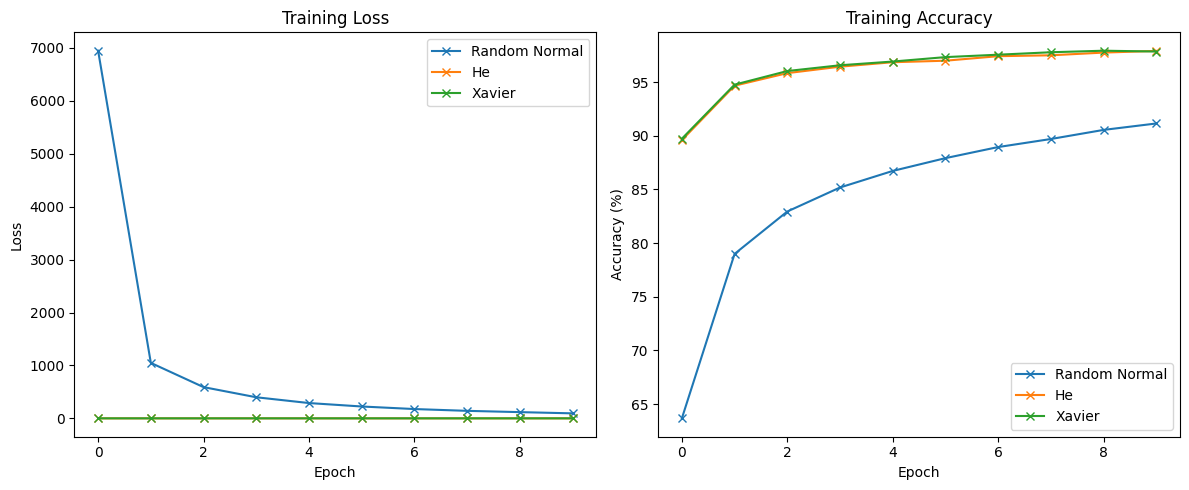

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the Neural Network
class SevenLayerNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SevenLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Define Weight Initializations
def random_normal_initialization(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 1)
            m.bias.data.zero_()

def he_initialization(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
            m.bias.data.zero_()

def xavier_initialization(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            m.bias.data.zero_()

# Define Hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
LR = 0.001
EPOCH = 10

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Define Training
def train(model, train_loader, optimizer, criterion, device, epochs=EPOCH):
    losses = []
    accuracies = []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        average_loss = total_loss / len(train_loader.dataset)
        accuracy = 100. * correct / len(train_loader.dataset)
        print(f"Epoch {epoch+1}, Training loss: {average_loss}, Accuracy: {accuracy:.2f}%")
        losses.append(average_loss)
        accuracies.append(accuracy)
    return losses, accuracies

# main
initializations = ['Random Normal', 'He', 'Xavier']
initialization_functions = [random_normal_initialization, he_initialization, xavier_initialization]
all_losses = {}
all_accuracies = {}

# loop different 3 initializations Train
for init_name, init_func in zip(initializations, initialization_functions):
    print(init_name)
    model = SevenLayerNN(input_size=28*28, num_classes=10).to(device)
    #print(model)
    init_func(model)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.CrossEntropyLoss()
    losses, accuracies = train(model, train_loader, optimizer, criterion, device)
    all_losses[init_name] = losses
    all_accuracies[init_name] = accuracies

# Plotting train loss and accuracy with different 3 initializations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for init_name, losses in all_losses.items():
    plt.plot(losses, '-x', label=init_name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for init_name, accuracies in all_accuracies.items():
    plt.plot(accuracies, '-x', label=init_name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


## 03

Training with SGD:
Epoch 1, Loss: 2.2971843163808185, Accuracy: 11.2%
Epoch 2, Loss: 1.5739082083861033, Accuracy: 44.43333333333333%
Epoch 3, Loss: 0.48124897013107937, Accuracy: 86.11%
Epoch 4, Loss: 0.2711700500736634, Accuracy: 92.46666666666667%
Epoch 5, Loss: 0.19418471899479628, Accuracy: 94.53333333333333%
Epoch 6, Loss: 0.14967245710591476, Accuracy: 95.65333333333334%
Epoch 7, Loss: 0.1213306133856376, Accuracy: 96.32166666666667%
Epoch 8, Loss: 0.10170420869328081, Accuracy: 96.98%
Epoch 9, Loss: 0.08737746587550889, Accuracy: 97.405%
Epoch 10, Loss: 0.07291311577831705, Accuracy: 97.81333333333333%


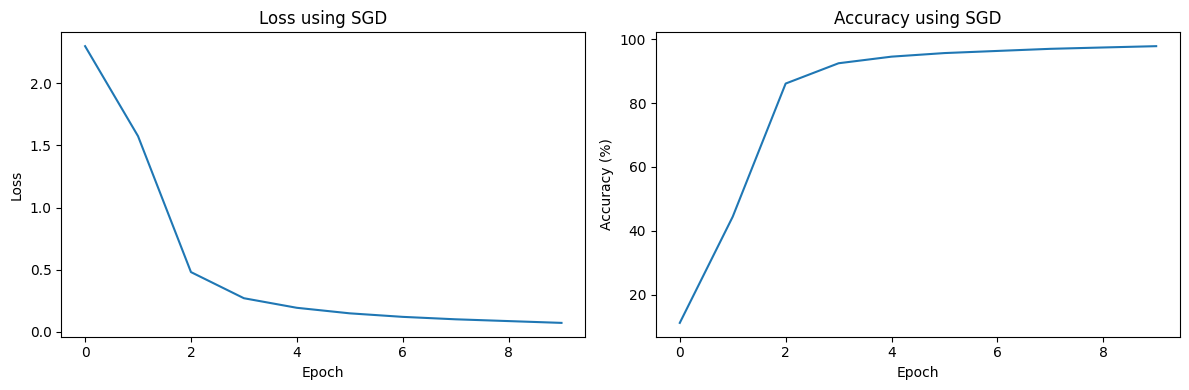


Training with Adam:
Epoch 1, Loss: 0.45285748569741846, Accuracy: 85.54166666666667%
Epoch 2, Loss: 0.18566056743649145, Accuracy: 94.74%
Epoch 3, Loss: 0.14139458602269492, Accuracy: 95.97%
Epoch 4, Loss: 0.12178764755769322, Accuracy: 96.56%
Epoch 5, Loss: 0.10201348260830467, Accuracy: 97.06166666666667%
Epoch 6, Loss: 0.09405997926080599, Accuracy: 97.28833333333333%
Epoch 7, Loss: 0.08222435852377676, Accuracy: 97.70666666666666%
Epoch 8, Loss: 0.07408531284738953, Accuracy: 97.82666666666667%
Epoch 9, Loss: 0.06691174149105791, Accuracy: 98.05166666666666%
Epoch 10, Loss: 0.06673808459994228, Accuracy: 98.13166666666666%


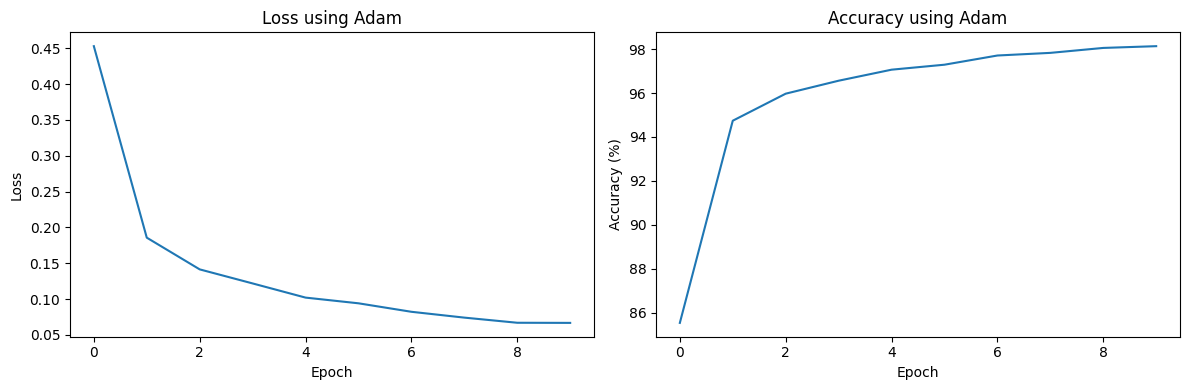


Training with RMSprop:
Epoch 1, Loss: 0.4945583731867373, Accuracy: 83.66333333333333%
Epoch 2, Loss: 0.19275979615536828, Accuracy: 94.66%
Epoch 3, Loss: 0.14989885459262878, Accuracy: 95.755%
Epoch 4, Loss: 0.1284599139738828, Accuracy: 96.46166666666667%
Epoch 5, Loss: 0.11362221709575193, Accuracy: 96.89833333333333%
Epoch 6, Loss: 0.10288893980864086, Accuracy: 97.225%
Epoch 7, Loss: 0.09692733215772702, Accuracy: 97.41833333333334%
Epoch 8, Loss: 0.09401208625731136, Accuracy: 97.48333333333333%
Epoch 9, Loss: 0.09055409720596799, Accuracy: 97.63666666666667%
Epoch 10, Loss: 0.08869045826967922, Accuracy: 97.65666666666667%


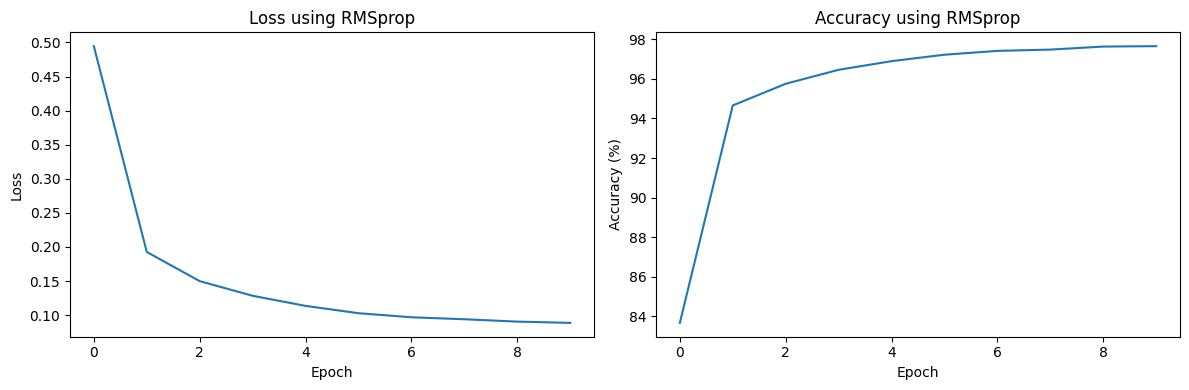

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


# Define Hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 32
LR = 0.001
EPOCH = 10


# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# Define the neural network with 7 layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 400)
        self.fc3 = nn.Linear(400, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 100)
        self.fc6 = nn.Linear(100, 50)
        self.fc7 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

net = Net().to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Training function
def train(optimizer, optimizer_name):
    loss_values = []
    accuracy_values = []
    for epoch in range(EPOCH):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        loss_values.append(running_loss/len(trainloader))
        accuracy_values.append(100.*correct/total)
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}, Accuracy: {100.*correct/total}%")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss_values)
    plt.title(f'Loss using {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_values)
    plt.title(f'Accuracy using {optimizer_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    
    plt.tight_layout()
    plt.show()

print("Training with SGD:")
optimizer_sgd = optim.SGD(net.parameters(), lr=LR, momentum=0.9)
train(optimizer_sgd, "SGD")

print("\nTraining with Adam:")
net = Net().to(device)  # Reset the network for fresh training with new optim
optimizer_adam = optim.Adam(net.parameters(), lr=LR)
train(optimizer_adam, "Adam")

print("\nTraining with RMSprop:")
net = Net().to(device) # Reset the network for fresh training with new optim
optimizer_rmsprop = optim.RMSprop(net.parameters(), lr=LR)
train(optimizer_rmsprop, "RMSprop")


## 04

BatchNormNN(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=50, bias=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=50, out_features=25, bias=True)
    (13): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=25, out_features=10, bias=True)
  )
)
LayerNormNN(
  (main): Sequential(
    (0): Linear(in_feat

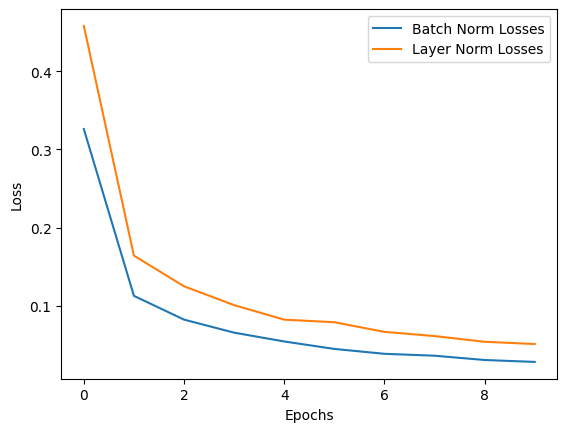

Training time with Batch Normalization: 148.50 seconds
Training time with Layer Normalization: 149.34 seconds


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# Define Hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
LR = 0.001
EPOCH = 10

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# Define the neural network with batch normalization
class BatchNormNN(nn.Module):
    def __init__(self):
        super(BatchNormNN, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.BatchNorm1d(250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.Linear(50, 25),
            nn.BatchNorm1d(25),
            nn.ReLU(),
            nn.Linear(25, 10)
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.main(x)

# Define the neural network with layer normalization
class LayerNormNN(nn.Module):
    def __init__(self):
        super(LayerNormNN, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28*28, 500),
            nn.LayerNorm(500),
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.LayerNorm(250),
            nn.ReLU(),
            nn.Linear(250, 100),
            nn.LayerNorm(100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.LayerNorm(50),
            nn.ReLU(),
            nn.Linear(50, 25),
            nn.LayerNorm(25),
            nn.ReLU(),
            nn.Linear(25, 10)
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.main(x)

# Training function
def train(model, trainloader, epochs=EPOCH):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_list = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
        loss_list.append(running_loss / len(trainloader))
    return loss_list

# Train both models
batch_norm_model = BatchNormNN().to(device)
print(batch_norm_model)
layer_norm_model = LayerNormNN().to(device)
print(layer_norm_model)

start_time = time.time()
batch_norm_losses = train(batch_norm_model, trainloader, 10)
batch_norm_time = time.time() - start_time

start_time = time.time()
layer_norm_losses = train(layer_norm_model, trainloader, 10)
layer_norm_time = time.time() - start_time

# Plot the results
plt.plot(batch_norm_losses, label='Batch Norm Losses')
plt.plot(layer_norm_losses, label='Layer Norm Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Training time with Batch Normalization: {batch_norm_time:.2f} seconds")
print(f"Training time with Layer Normalization: {layer_norm_time:.2f} seconds")
